Welcome to the dataset implementation notebook !! (the content of this notebook will be merged to the other one fla fin)
In this you'll need to prepare the dataset for federated learning , tsemma deja cleaning it and la diviser en parties pour plusiers 'client'
Good luck aaaaaa
Dataset : MIMIC-III Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/MIMIC-III/"


ls: cannot access '/content/drive/My Drive/MIMIC-III/': No such file or directory


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = "/content/drive/My Drive/MIMIC-III/ADMISSIONS.csv"
df = pd.read_csv(file_path)

df.head()  # Affiche les premières lignes du fichier


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [ ]:
import pandas as pd
admissions = pd.read_csv("/content/drive/My Drive/MIMIC-III/ADMISSIONS.csv", usecols=["subject_id", "hadm_id", "admission_type", "hospital_expire_flag"])


In [ ]:
patients = pd.read_csv("/content/drive/My Drive/MIMIC-III/PATIENTS.csv", usecols=["subject_id", "gender", "dob", "dod"])


# Convertir en datetime et calculer l'âge
patients["dob"] = pd.to_datetime(patients["dob"])
patients["age"] = (pd.to_datetime("2100-01-01") - patients["dob"]).dt.days // 365


In [ ]:
# import pandas as pd

# file_path = "/content/drive/My Drive/MIMIC-III/ICUSTAYS.csv"
# df = pd.read_csv(file_path)

# df.head()
icu = pd.read_csv("/content/drive/My Drive/MIMIC-III/ICUSTAYS.csv", usecols=["hadm_id", "los"])


In [ ]:
 chartevents = pd.read_csv("/content/drive/My Drive/MIMIC-III/CHARTEVENTS.csv", usecols=["hadm_id", "itemid", "valuenum"])
 vital_signs = chartevents[chartevents["itemid"].isin([220045, 220179, 220180, 220210, 223761, 220277])]
# import pandas as pd

# file_path = "/content/drive/My Drive/MIMIC-III/CHARTEVENTS.csv"
# df = pd.read_csv(file_path)

# df.head()


In [ ]:
labevents = pd.read_csv("/content/drive/My Drive/MIMIC-III/LABEVENTS.csv", usecols=["hadm_id", "itemid", "valuenum"])
labs = labevents[labevents["itemid"].isin([50809, 50810, 50811])]


In [ ]:
diagnoses = pd.read_csv("/content/drive/My Drive/MIMIC-III/DIAGNOSES_ICD.csv", usecols=["hadm_id", "icd9_code"])


Fusionner toutes les données
Une fois qu’on a extrait chaque fichier, on fusionne les datasets sur hadm_id :

In [ ]:
# Fusionner les tables
df = admissions.merge(patients, on="subject_id")
df = df.merge(icu, on="hadm_id", how="left")
df = df.merge(vital_signs, on="hadm_id", how="left")
df = df.merge(labs, on="hadm_id", how="left")
df = df.merge(diagnoses, on="hadm_id", how="left")

# Remplacer les NaN par la moyenne de chaque colonne
#df.fillna(df.mean(), inplace=True)


In [ ]:
import pandas as pd

# Afficher les premières lignes du dataset final
print(df.head())


   subject_id  hadm_id admission_type  hospital_expire_flag gender        dob  \
0       10006   142345      EMERGENCY                     0      F 2094-03-05   
1       10006   142345      EMERGENCY                     0      F 2094-03-05   
2       10006   142345      EMERGENCY                     0      F 2094-03-05   
3       10006   142345      EMERGENCY                     0      F 2094-03-05   
4       10006   142345      EMERGENCY                     0      F 2094-03-05   

                   dod  age     los  itemid_x  valuenum_x  itemid_y  \
0  2165-08-12 00:00:00    5  1.6325       NaN         NaN       NaN   
1  2165-08-12 00:00:00    5  1.6325       NaN         NaN       NaN   
2  2165-08-12 00:00:00    5  1.6325       NaN         NaN       NaN   
3  2165-08-12 00:00:00    5  1.6325       NaN         NaN       NaN   
4  2165-08-12 00:00:00    5  1.6325       NaN         NaN       NaN   

   valuenum_y icd9_code  
0         NaN     99591  
1         NaN     99662  
2       

In [ ]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Visualisation des valeurs manquantes avec un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Valeurs Manquantes")
plt.show()


subject_id                   0
hadm_id                      0
admission_type               0
hospital_expire_flag         0
gender                       0
dob                          0
dod                          0
age                          0
los                          0
itemid_x                  5483
valuenum_x                5483
itemid_y                207033
valuenum_y              221988
icd9_code                    0
dtype: int64


KeyboardInterrupt: 

<ipython-input-14-bcbb94e55c1e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="hospital_expire_flag", data=df, palette="coolwarm")


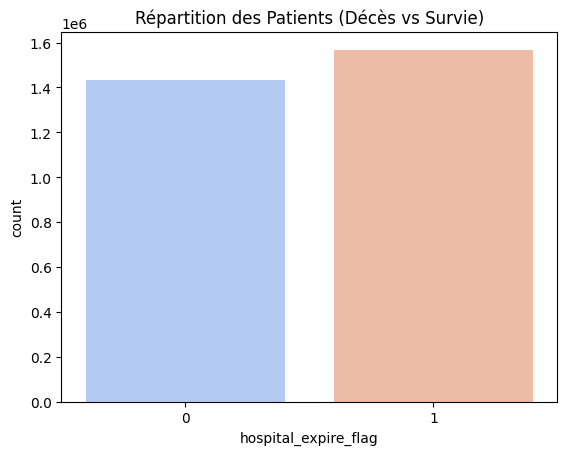

In [ ]:
sns.countplot(x="hospital_expire_flag", data=df, palette="coolwarm")
plt.title("Répartition des Patients (Décès vs Survie)")
plt.show()


Distribution des Variables Numériques
On va voir comment les variables sont distribuées.

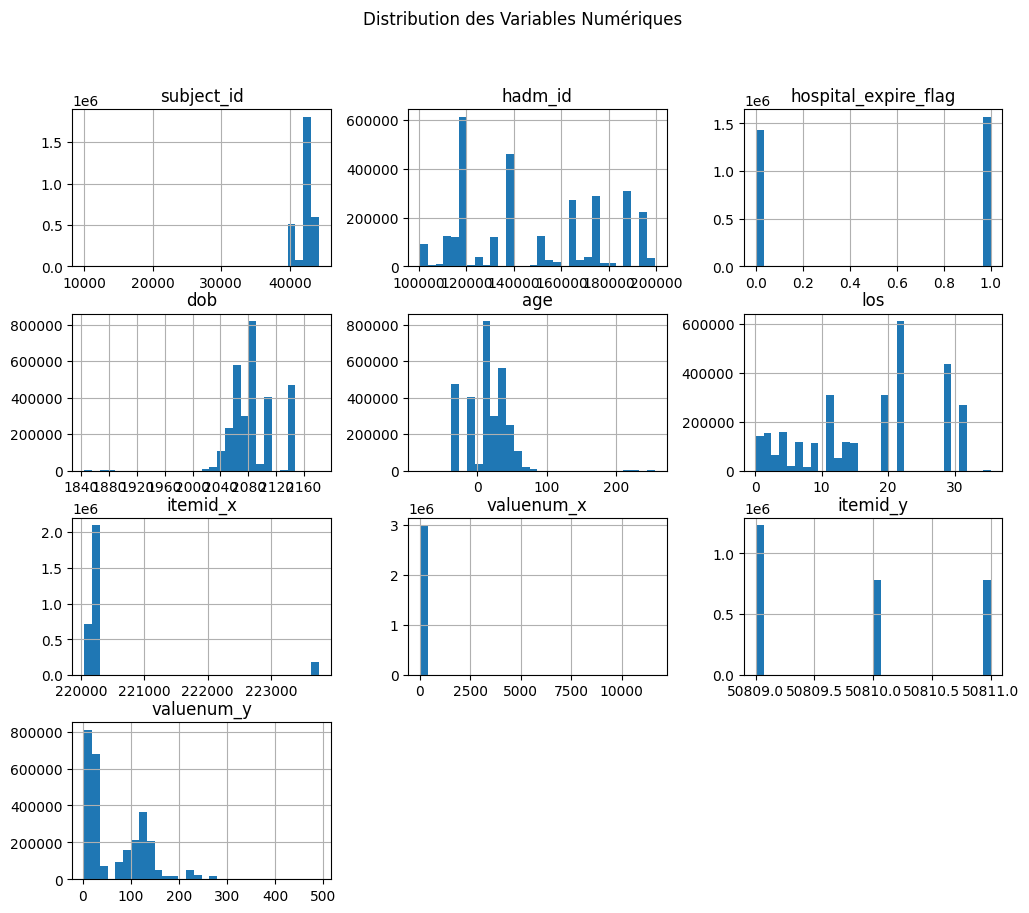

In [ ]:
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Distribution des Variables Numériques")
plt.show()


Corrélation entre les Variables

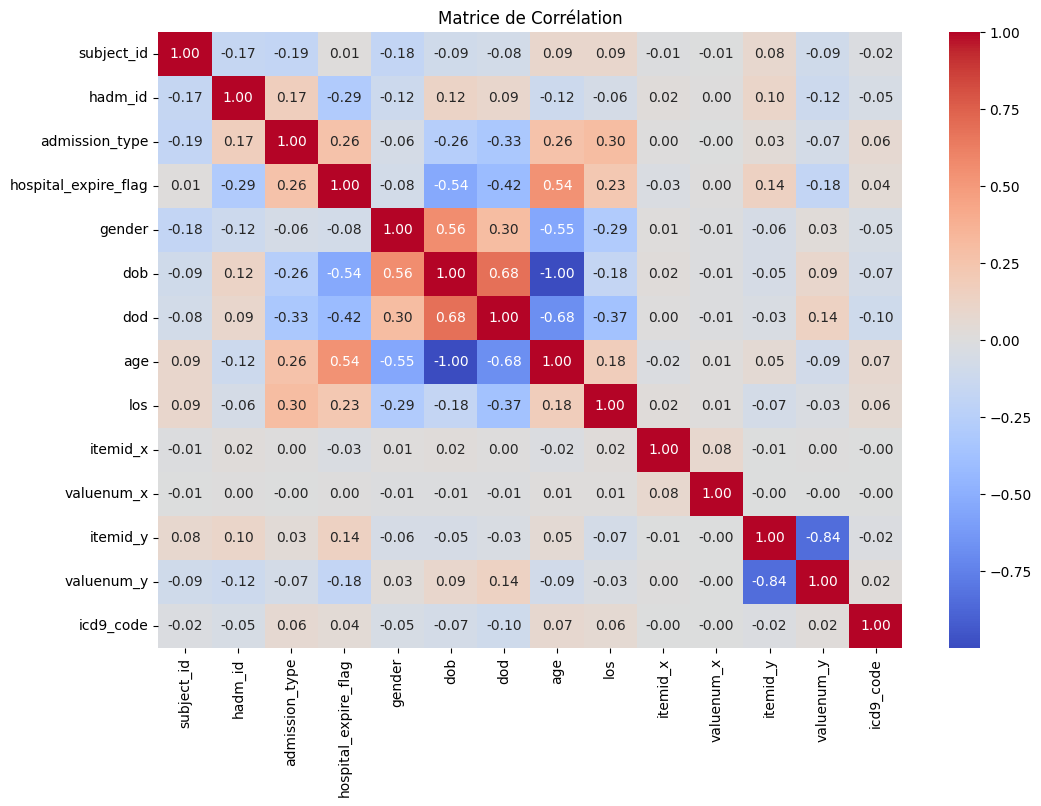

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoder toutes les colonnes catégoriques
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])  # Transformer la colonne en numérique
        label_encoders[col] = le  # Sauvegarder l'encodeur au cas où

df_encoded = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()


Encodage des Variables Catégorielles

In [ ]:
# Convertir gender en 0 (Femme) et 1 (Homme)
df["gender"] = df["gender"].map({"F": 0, "M": 1})

# Encodage one-hot de admission_type
df = pd.get_dummies(df, columns=["admission_type"], drop_first=True)


Standardisation des Variables Numériques

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Sélection des colonnes numériques
# numeric_cols = ["age", "icu_los", "heart_rate", "blood_pressure", "respiratory_rate", "temperature", "oxygen_saturation", "blood_sugar"]

# # Standardisation
# scaler = StandardScaler()
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df.columns)  # Afficher toutes les colonnes du DataFrame
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Vérifier les types de données
print(df.dtypes)

# Garder seulement les colonnes numériques existantes
existing_cols = [col for col in numeric_cols if col in df.columns]

# Vérifier si elles sont bien numériques
df[existing_cols] = df[existing_cols].apply(pd.to_numeric, errors='coerce')

# Standardisation
if existing_cols:
    scaler = StandardScaler()
    df[existing_cols] = scaler.fit_transform(df[existing_cols])
else:
    print("Aucune colonne valide pour la normalisation.")




Index(['subject_id', 'hadm_id', 'hospital_expire_flag', 'gender', 'dob', 'dod',
       'age', 'los', 'itemid_x', 'valuenum_x', 'itemid_y', 'valuenum_y',
       'icd9_code', 'admission_type_1', 'admission_type_2'],
      dtype='object')
subject_id                       int64
hadm_id                          int64
hospital_expire_flag             int64
gender                         float64
dob                     datetime64[ns]
dod                              int64
age                              int64
los                            float64
itemid_x                       float64
valuenum_x                     float64
itemid_y                       float64
valuenum_y                     float64
icd9_code                        int64
admission_type_1                  bool
admission_type_2                  bool
dtype: object


   row_id  subject_id  hadm_id  icustay_id dbsource first_careunit  \
0   12742       10006   142345      206504  carevue           MICU   
1   12747       10011   105331      232110  carevue           MICU   
2   12749       10013   165520      264446  carevue           MICU   
3   12754       10017   199207      204881  carevue            CCU   
4   12755       10019   177759      228977  carevue           MICU   

  last_careunit  first_wardid  last_wardid               intime  \
0          MICU            52           52  2164-10-23 21:10:15   
1          MICU            15           15  2126-08-14 22:34:00   
2          MICU            15           15  2125-10-04 23:38:00   
3           CCU             7            7  2149-05-29 18:52:29   
4          MICU            15           15  2163-05-14 20:43:56   

               outtime      los  
0  2164-10-25 12:21:07   1.6325  
1  2126-08-28 18:59:00  13.8507  
2  2125-10-07 15:13:52   2.6499  
3  2149-05-31 22:19:17   2.1436  
4  216

KeyError: 'age'

# This is the nwe section based on this [article](https://www.sciencedirect.com/science/article/pii/S1532046418300716?ref=pdf_download&fr=RR-2&rr=91a32e1488a1ba96)

In [ ]:
import pandas as pd
import numpy as np

# --- LOAD CSV FILES ---
# Update these paths to match your local CSV file locations
chartevents_file = "/content/drive/My Drive/MIMIC-III/CHARTEVENTS.csv"
labevents_file = "/content/drive/My Drive/MIMIC-III/LABEVENTS.csv"
outputevents_file = "/content/drive/My Drive/MIMIC-III/OUTPUTEVENTS.csv"
admissions_file = "/content/drive/My Drive/MIMIC-III/ADMISSIONS.csv"

# Load required columns to save memory
usecols_chartevents = ["icustay_id", "charttime", "itemid", "valuenum"]
usecols_labevents = ["subject_id", "hadm_id", "charttime", "itemid", "valuenum"]
usecols_outputevents = ["subject_id", "hadm_id", "charttime", "itemid", "value"]


In [ ]:
df_chartevents = pd.read_csv("/content/drive/My Drive/MIMIC-III/CHARTEVENTS.csv", usecols=usecols_chartevents, low_memory=False)
df_labevents = pd.read_csv("/content/drive/My Drive/MIMIC-III/LABEVENTS.csv", usecols=usecols_labevents, low_memory=False)
df_outputevents = pd.read_csv(outputevents_file, usecols=usecols_outputevents, low_memory=False)
df_admissions = pd.read_csv(admissions_file, usecols=["subject_id", "admittime"])

## FEATURE EXTRACTION

1. Extract Glasgow Coma Scale (GCS) Features


In [ ]:
gcs_items = {
    "GCSVerbal": [723, 223900],
    "GCSMotor": [454, 223901],
    "GCSEyes": [184, 220739]
}
df_gcs = df_chartevents[df_chartevents["itemid"].isin(sum(gcs_items.values(), []))]
df_gcs["Feature"] = df_gcs["itemid"].map({v: k for k, lst in gcs_items.items() for v in lst})
df_gcs = df_gcs.pivot_table(index=["icustay_id", "charttime"], columns="Feature", values="valuenum", aggfunc="max")
df_gcs["GCS_Total"] = df_gcs.sum(axis=1)
df_gcs.reset_index(inplace=True)


<ipython-input-18-05e92c8aa275>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gcs["Feature"] = df_gcs["itemid"].map({v: k for k, lst in gcs_items.items() for v in lst})


2. Extract Vital Signs


In [ ]:
vital_signs = {
    "SysBP": [51, 442, 455, 220179, 220050],
    "HeartRate": [211, 220045],
    "Temperature_F": [678, 223761]
}
df_vitals = df_chartevents[df_chartevents["itemid"].isin(sum(vital_signs.values(), []))]
df_vitals["Feature"] = df_vitals["itemid"].map({v: k for k, lst in vital_signs.items() for v in lst})
df_vitals = df_vitals.pivot_table(index=["icustay_id", "charttime"], columns="Feature", values="valuenum", aggfunc="max")
df_vitals["Temperature_C"] = (df_vitals["Temperature_F"] - 32) * 5/9  # Convert F to C
df_vitals.drop(columns=["Temperature_F"], inplace=True)
df_vitals.reset_index(inplace=True)


<ipython-input-19-06c532115129>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vitals["Feature"] = df_vitals["itemid"].map({v: k for k, lst in vital_signs.items() for v in lst})


3. Extract PaO₂/FiO₂ Ratio

In [ ]:
import pandas as pd

# --- Load LABEVENTS (for PaO2) ---
df_labevents = pd.read_csv("/content/drive/My Drive/MIMIC-III/LABEVENTS.csv", low_memory=False)

# Extract PaO2 from LABEVENTS
df_pao2 = df_labevents[df_labevents["itemid"] == 50821].copy()  # PaO2 itemid
df_pao2["Feature"] = "PaO2"
df_pao2 = df_pao2.pivot_table(index=["subject_id", "hadm_id", "charttime"], columns="Feature", values="valuenum", aggfunc="max")
df_pao2.reset_index(inplace=True)

# --- Load CHARTEVENTS (for FiO2) ---
df_chartevents = pd.read_csv("/content/drive/My Drive/MIMIC-III/CHARTEVENTS.csv", low_memory=False)

# Extract FiO2 from CHARTEVENTS
fio2_items = [223835, 190]  # FiO2 confirmed item IDs
df_fio2 = df_chartevents[df_chartevents["itemid"].isin(fio2_items)].copy()
df_fio2["Feature"] = "FiO2"
df_fio2 = df_fio2.pivot_table(index=["subject_id", "hadm_id", "charttime"], columns="Feature", values="valuenum", aggfunc="max")
df_fio2.reset_index(inplace=True)

# --- Merge PaO2 and FiO2 ---
df_pao2_fio2 = pd.merge(df_pao2, df_fio2, on=["subject_id", "hadm_id", "charttime"], how="outer")

# --- Compute PaO2/FiO2 Ratio ---
df_pao2_fio2["PaO2_FiO2_Ratio"] = df_pao2_fio2["PaO2"] / df_pao2_fio2["FiO2"]

# Handle missing FiO2 values
df_pao2_fio2["PaO2_FiO2_Ratio"].fillna(df_pao2_fio2["PaO2"], inplace=True)

# Save to CSV
df_pao2_fio2.to_csv("processed_pao2_fio2.csv", index=False)

# Print sample data
print(df_pao2_fio2.head())
print("✅ Extraction and merging completed successfully!")


Feature  subject_id   hadm_id            charttime   PaO2  FiO2  \
0             10011  105331.0  2126-08-15 04:25:00  119.0   NaN   
1             10011  105331.0  2126-08-17 22:23:00  103.0   NaN   
2             10013  165520.0  2125-10-04 23:59:00   60.0   NaN   
3             10013  165520.0  2125-10-05 00:00:00    NaN   0.6   
4             10013  165520.0  2125-10-05 00:44:00  115.0   NaN   

Feature  PaO2_FiO2_Ratio  
0                  119.0  
1                  103.0  
2                   60.0  
3                    NaN  
4                  115.0  
✅ Extraction and merging completed successfully!


<ipython-input-20-d33eb30aba04>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pao2_fio2["PaO2_FiO2_Ratio"].fillna(df_pao2_fio2["PaO2"], inplace=True)


Extract Urine Output

In [ ]:
# Define item IDs for urine output
urine_items = [40055, 43175, 40069, 40094, 40715, 40473, 40085, 40057, 40056]

# Filter OUTPUTEVENTS for urine output items
df_urine = df_outputevents[df_outputevents["itemid"].isin(urine_items)].copy()

# Check if 'valuenum' exists, else use 'value'
if "valuenum" in df_urine.columns:
    value_column = "valuenum"
elif "value" in df_urine.columns:
    value_column = "value"
else:
    raise KeyError("⚠ No valid urine output column found in OUTPUTEVENTS.csv!")

# Group by subject_id, hadm_id, and charttime
df_urine = df_urine.groupby(["subject_id", "hadm_id", "charttime"])[value_column].sum().reset_index()

# Rename column
df_urine.rename(columns={value_column: "UrineOutput"}, inplace=True)

# Show sample data
print(df_urine.head())
print("✅ Urine output extraction completed successfully!")


   subject_id  hadm_id            charttime  UrineOutput
0       10006   142345  2164-10-24 00:00:00        100.0
1       10006   142345  2164-10-25 03:00:00         10.0
2       10011   105331  2126-08-14 22:00:00        220.0
3       10011   105331  2126-08-14 23:00:00         50.0
4       10011   105331  2126-08-15 00:00:00         50.0
✅ Urine output extraction completed successfully!


5. Extract Laboratory Values

In [ ]:
# Define lab item IDs
lab_items = {
    "WBC": [51300],
    "Bicarbonate": [50882],
    "Sodium": [950824, 50983],
    "Potassium": [50822, 50971],
    "Bilirubin": [50885],
    "BUN": [51006]
}

# Filter LABEVENTS for selected lab test items
df_labs = df_labevents[df_labevents["itemid"].isin(sum(lab_items.values(), []))].copy()  # Use .copy() to avoid warnings

# Map itemid to feature names
df_labs["Feature"] = df_labs["itemid"].map({v: k for k, lst in lab_items.items() for v in lst})

# Pivot table using subject_id and hadm_id instead of icustay_id
df_labs = df_labs.pivot_table(index=["subject_id", "hadm_id", "charttime"],
                              columns="Feature", values="valuenum", aggfunc="max")

# Reset index to flatten the DataFrame
df_labs.reset_index(inplace=True)

# Show sample data
print(df_labs.head())
print("✅ Lab test extraction completed successfully!")


Feature  subject_id   hadm_id            charttime   BUN  Bicarbonate  \
0             10006  142345.0  2164-10-23 17:38:00   9.0         29.0   
1             10006  142345.0  2164-10-24 03:00:00  11.0         31.0   
2             10006  142345.0  2164-10-25 09:30:00  20.0         29.0   
3             10006  142345.0  2164-10-27 05:11:00  11.0         25.0   
4             10006  142345.0  2164-10-28 09:00:00  15.0         26.0   

Feature  Bilirubin  Potassium  Sodium  WBC  
0              1.0        6.0   139.0  NaN  
1              NaN        4.4   139.0  NaN  
2              NaN        4.6   138.0  NaN  
3              NaN        4.6   139.0  NaN  
4              NaN        5.1   141.0  NaN  
✅ Lab test extraction completed successfully!


 MERGE DATAFRAMES

In [ ]:
import pandas as pd

# Assuming dfs is your list of DataFrames
dfs = [df_gcs, df_vitals, df_pao2_fio2, df_urine, df_labs]  # Replace with your actual DataFrame names

# Ensure 'subject_id', 'hadm_id', and 'charttime' are present in all DataFrames
for i, df in enumerate(dfs):
    # 1. Add missing columns if needed
    for col in ["subject_id", "hadm_id", "charttime"]:
        if col not in df.columns:
            df[col] = pd.NA  # or any appropriate default value

    # 2. Convert to consistent data types if needed
    for col in ["subject_id", "hadm_id"]:
        if df[col].dtype != 'int64':  # Adjust dtype if necessary
            df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')  # Handle potential errors

    # 3. Handle charttime - convert to datetime if needed
    if df["charttime"].dtype != '<M8[ns]':
        df["charttime"] = pd.to_datetime(df["charttime"])

    dfs[i] = df  # Update the DataFrame in the list

# Now perform the merge
df_merged = dfs[0]
for df in dfs[1:]:
    df_merged = df_merged.merge(df, on=["subject_id", "hadm_id", "charttime"], how="outer")

# Show sample data
print(df_merged.head())
print("✅ Merging completed successfully!")

   icustay_id_x           charttime  GCSEyes  GCSMotor  GCSVerbal  GCS_Total  \
0           NaN 2164-10-23 17:38:00      NaN       NaN        NaN        NaN   
1           NaN 2164-10-24 00:00:00      NaN       NaN        NaN        NaN   
2           NaN 2164-10-24 03:00:00      NaN       NaN        NaN        NaN   
3           NaN 2164-10-25 03:00:00      NaN       NaN        NaN        NaN   
4           NaN 2164-10-25 09:30:00      NaN       NaN        NaN        NaN   

   subject_id  hadm_id  icustay_id_y  HeartRate  ...  PaO2  FiO2  \
0       10006   142345           NaN        NaN  ...   NaN   NaN   
1       10006   142345           NaN        NaN  ...   NaN   NaN   
2       10006   142345           NaN        NaN  ...   NaN   NaN   
3       10006   142345           NaN        NaN  ...   NaN   NaN   
4       10006   142345           NaN        NaN  ...   NaN   NaN   

   PaO2_FiO2_Ratio  UrineOutput   BUN  Bicarbonate  Bilirubin  Potassium  \
0              NaN          NaN   

# *PREPROCESSING

Sort by ICU stay and time

In [ ]:
# Sort using available columns: subject_id, hadm_id, and charttime
df_merged.sort_values(["subject_id", "hadm_id", "charttime"], inplace=True)

# Fill missing values
df_merged.fillna(method="ffill", inplace=True)
df_merged.fillna(method="bfill", inplace=True)
df_merged.fillna(df_merged.median(), inplace=True)

# Remove Outliers
outlier_bounds = {
    "SysBP": (50, 250),
    "HeartRate": (30, 200),
    "Temperature_C": (30, 42),
    "PaO2_FiO2_Ratio": (50, 600),
    "UrineOutput": (0, 8000),
    "WBC": (2, 30),
    "Bicarbonate": (5, 45),
    "Sodium": (120, 160),
    "Potassium": (2, 7),
    "Bilirubin": (0.1, 50),
    "BUN": (2, 200),
    "GCS_Total": (3, 15)
}

for col, (low, high) in outlier_bounds.items():
    if col in df_merged.columns:  # Avoid errors if column is missing
        df_merged[col] = np.clip(df_merged[col], low, high)

# Show final dataset
print(df_merged.head())
print("✅ Data sorting and cleaning completed successfully!")


   icustay_id_x           charttime  GCSEyes  GCSMotor  GCSVerbal  GCS_Total  \
0      254635.0 2164-10-23 17:38:00      3.0       4.0        4.0       11.0   
1      254635.0 2164-10-24 00:00:00      3.0       4.0        4.0       11.0   
2      254635.0 2164-10-24 03:00:00      3.0       4.0        4.0       11.0   
3      254635.0 2164-10-25 03:00:00      3.0       4.0        4.0       11.0   
4      254635.0 2164-10-25 09:30:00      3.0       4.0        4.0       11.0   

   subject_id  hadm_id  icustay_id_y  HeartRate  ...   PaO2  FiO2  \
0       10006   142345      254635.0       72.0  ...  119.0   0.6   
1       10006   142345      254635.0       72.0  ...  119.0   0.6   
2       10006   142345      254635.0       72.0  ...  119.0   0.6   
3       10006   142345      254635.0       72.0  ...  119.0   0.6   
4       10006   142345      254635.0       72.0  ...  119.0   0.6   

   PaO2_FiO2_Ratio  UrineOutput   BUN  Bicarbonate  Bilirubin  Potassium  \
0            119.0        10

<ipython-input-24-c91e4132e351>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method="ffill", inplace=True)
<ipython-input-24-c91e4132e351>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method="bfill", inplace=True)


Exporting data

In [ ]:
df_merged.to_csv("processed_feature_set_A.csv", index=False)

print("Feature extraction and preprocessing completed. Data saved to 'processed_feature_set_A.csv'.")

Feature extraction and preprocessing completed. Data saved to 'processed_feature_set_A.csv'.


In [ ]:
import pandas as pd

# Charger les données
df_final = pd.read_csv("processed_feature_set_A.csv")

# Charger ADMISSIONS.csv pour récupérer DEATHTIME et DISCHTIME
df_admissions = pd.read_csv("/content/drive/My Drive/MIMIC-III/ADMISSIONS.csv",
                            usecols=["subject_id", "hadm_id", "deathtime", "dischtime"])

# Charger ICUSTAYS.csv pour récupérer INTIME (entrée en soins intensifs)
df_icustays = pd.read_csv("/content/drive/My Drive/MIMIC-III/ICUSTAYS.csv",
                          usecols=["subject_id", "hadm_id", "intime"])

# Charger PATIENTS.csv pour récupérer DOD (Date of Death, date de décès)
df_patients = pd.read_csv("/content/drive/My Drive/MIMIC-III/PATIENTS.csv",
                          usecols=["subject_id", "dod"])

# Convertir les dates en format datetime
df_admissions["deathtime"] = pd.to_datetime(df_admissions["deathtime"])
df_admissions["dischtime"] = pd.to_datetime(df_admissions["dischtime"])
df_icustays["intime"] = pd.to_datetime(df_icustays["intime"])
df_patients["dod"] = pd.to_datetime(df_patients["dod"])

# Fusionner avec ADMISSIONS (Mortalité en hôpital)
df_final = df_final.merge(df_admissions, on=["subject_id", "hadm_id"], how="left")

# Fusionner avec PATIENTS (DOD)
df_final = df_final.merge(df_patients, on="subject_id", how="left")

# Fusionner avec ICUSTAYS (INTIME pour soins intensifs)
df_final = df_final.merge(df_icustays, on=["subject_id", "hadm_id"], how="left")

# Créer la colonne de mortalité en hôpital
df_final["Mortality"] = df_final["deathtime"].notnull().astype(int)

# Créer la mortalité à 48h après admission en soins intensifs
df_final["Mortality_48h"] = ((df_final["dod"] - df_final["intime"]).dt.total_seconds() / 3600 < 48).astype(int)

# Créer la mortalité à 30 jours après la sortie de l'hôpital
df_final["Mortality_30d"] = ((df_final["dod"] - df_final["dischtime"]).dt.days < 30).astype(int)

# Supprimer les colonnes inutiles
df_final.drop(columns=["deathtime", "dischtime", "dod", "intime"], inplace=True)

# Sauvegarder le dataset final
df_final.to_csv("final_dataset_with_mortality.csv", index=False)

# Vérifier la distribution des labels
print(df_final[["Mortality", "Mortality_48h", "Mortality_30d"]].sum())
print(df_final.head())
print("✅ Ajout des labels de mortalité terminé avec succès !")


Mortality        5777
Mortality_48h     275
Mortality_30d    6517
dtype: int64
   icustay_id_x            charttime  GCSEyes  GCSMotor  GCSVerbal  GCS_Total  \
0      254635.0  2164-10-23 17:38:00      3.0       4.0        4.0       11.0   
1      254635.0  2164-10-24 00:00:00      3.0       4.0        4.0       11.0   
2      254635.0  2164-10-24 03:00:00      3.0       4.0        4.0       11.0   
3      254635.0  2164-10-25 03:00:00      3.0       4.0        4.0       11.0   
4      254635.0  2164-10-25 09:30:00      3.0       4.0        4.0       11.0   

   subject_id  hadm_id  icustay_id_y  HeartRate  ...  UrineOutput   BUN  \
0       10006   142345      254635.0       72.0  ...        100.0   9.0   
1       10006   142345      254635.0       72.0  ...        100.0   9.0   
2       10006   142345      254635.0       72.0  ...        100.0  11.0   
3       10006   142345      254635.0       72.0  ...         10.0  11.0   
4       10006   142345      254635.0       72.0  ...       

# Partition the Data for 10 Clients (Non-IID Distribution)

In [ ]:
# Non-IID partitioning and splitting into train/test sets
NUM_CLIENTS = 10
NON_IID_SPLIT = [0.1, 0.15, 0.2, 0.05, 0.12, 0.08, 0.1, 0.07, 0.08, 0.05]

def non_iid_partition(df, num_clients, split_ratios):
    client_data = []
    start_idx = 0

    for i in range(num_clients):
        client_size = int(len(df) * split_ratios[i])
        client_df = df.iloc[start_idx:start_idx + client_size]

        # Split into 80% train and 20% test
        train_df, test_df = train_test_split(client_df, test_size=0.2, random_state=42)
        client_data.append((train_df, test_df))

        start_idx += client_size

    return client_data

client_data = non_iid_partition(df, NUM_CLIENTS, NON_IID_SPLIT)


# Check **Partitioning**

In [ ]:
# Check number of samples per client
for i, (train, test) in enumerate(client_data):
    print(f"Client {i+1}:")
    print(f"  Train Samples: {len(train)}")
    print(f"  Test Samples: {len(test)}")
    print("-" * 30)

# Optional: Show head of one client
print("\nExample Client Data (Client 1 - Train):")
print(client_data[0][0].head())


Client 1:
  Train Samples: 9
  Test Samples: 3
------------------------------
Client 2:
  Train Samples: 15
  Test Samples: 4
------------------------------
Client 3:
  Train Samples: 20
  Test Samples: 5
------------------------------
Client 4:
  Train Samples: 4
  Test Samples: 2
------------------------------
Client 5:
  Train Samples: 12
  Test Samples: 3
------------------------------
Client 6:
  Train Samples: 8
  Test Samples: 2
------------------------------
Client 7:
  Train Samples: 9
  Test Samples: 3
------------------------------
Client 8:
  Train Samples: 7
  Test Samples: 2
------------------------------
Client 9:
  Train Samples: 8
  Test Samples: 2
------------------------------
Client 10:
  Train Samples: 4
  Test Samples: 2
------------------------------

Example Client Data (Client 1 - Train):
    row_id  subject_id  hadm_id            admittime            dischtime  \
8    12282       10032   140372  2138-04-02 19:52:00  2138-04-15 14:35:00   
5    12277       1002

In [ ]:
print(df.columns)


Index(['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime',
       'deathtime', 'admission_type', 'admission_location',
       'discharge_location', 'insurance', 'language', 'religion',
       'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
       'hospital_expire_flag', 'has_chartevents_data'],
      dtype='object')


# Visualization : class distribution:

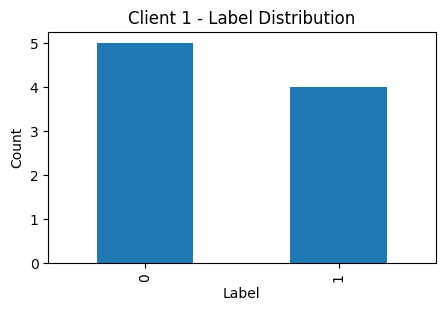

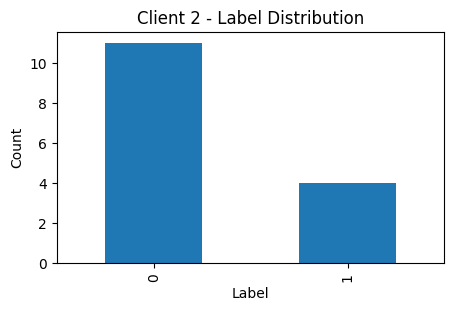

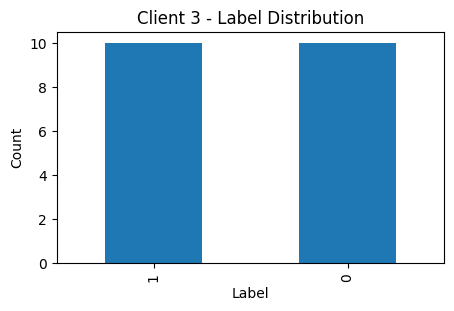

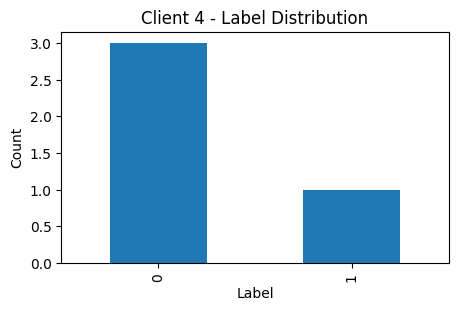

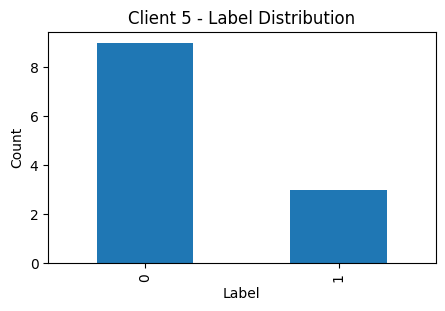

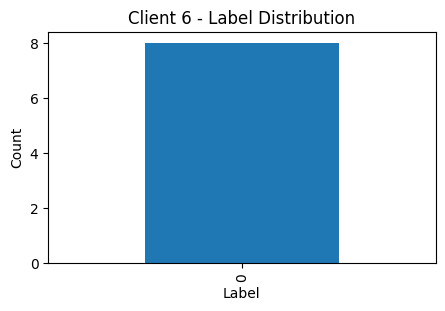

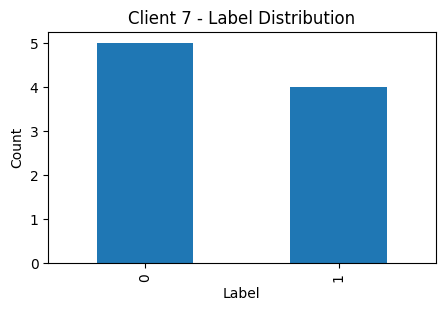

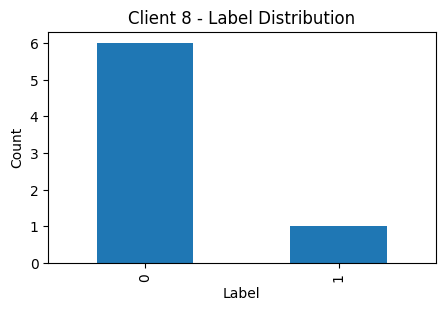

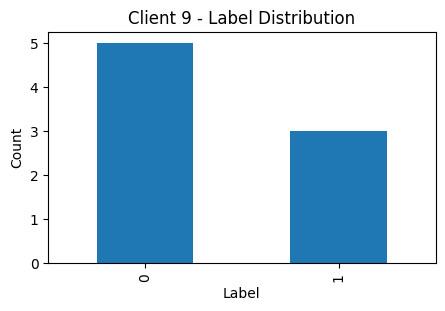

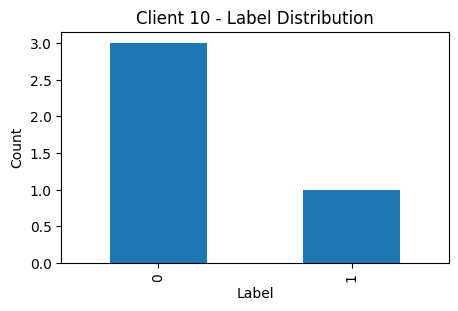

In [ ]:
for i, (train, _) in enumerate(client_data):
    plt.figure(figsize=(5, 3))
    target_column = 'hospital_expire_flag'  # Target column
    train[target_column].value_counts().plot(kind='bar')
    plt.title(f"Client {i+1} - Label Distribution")
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
#later to be config class
input_dim = 2
hidden_dim = 10
output_dim = 1

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_prob=0.5):
        """
        Initialize the NeuralNetwork model.

        Args:
            input_dim (int): Number of input features.
            hidden_dim (int): Number of neurons in the hidden layer.
            output_dim (int): Number of output classes (1 for binary classification).
            dropout_prob (float): Dropout probability for regularization (default: 0.5).
        """
        super(NeuralNetwork, self).__init__()  # Initialize the parent class (nn.Module)

        # First fully connected layer (input to hidden layer)
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        # Initialize weights using Kaiming (He) initialization for ReLU activation
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")

        # Second fully connected layer (hidden layer to output layer)
        self.layer_2 = nn.Linear(hidden_dim, output_dim)
        # Initialize weights using Xavier (Glorot) initialization for the output layer
        nn.init.xavier_uniform_(self.layer_2.weight)

        # Dropout layer for regularization
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        """
        Forward pass through the network.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, input_dim).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, output_dim).
        """
        # Apply the first fully connected layer followed by ReLU activation
        x = F.relu(self.layer_1(x))

        # Apply dropout for regularization
        x = self.dropout(x)

        # Apply the second fully connected layer
        x = self.layer_2(x)

        return x

In [ ]:


class FederatedClient:
    def __init__(self, client_id, train_data, test_data, input_dim, hidden_dim, output_dim, dropout_prob=0.5, lr=0.001):
        """
        Initialize a federated learning client.

        Args:
            client_id (str): Unique identifier for the client.
            train_data (tuple): Tuple of (features, labels) for training data.
            test_data (tuple): Tuple of (features, labels) for test data.
            input_dim (int): Number of input features.
            hidden_dim (int): Number of neurons in the hidden layer.
            output_dim (int): Number of output classes (1 for binary classification).
            dropout_prob (float): Dropout probability for regularization (default: 0.5).
            lr (float): Learning rate for the optimizer (default: 0.001).
        """
        self.client_id = client_id
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.dropout_prob = dropout_prob
        self.lr = lr

        # Prepare training and test data
        self.train_loader = self._prepare_data(train_data)
        self.test_loader = self._prepare_data(test_data)

        # Initialize the local model
        self.model = NeuralNetwork(input_dim, hidden_dim, output_dim, dropout_prob)
        self.criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss with logits
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)

    def _prepare_data(self, data):
        """
        Convert raw data into a PyTorch DataLoader.

        Args:
            data (tuple): Tuple of (features, labels).

        Returns:
            DataLoader: PyTorch DataLoader for the given data.
        """
        features, labels = data
        dataset = TensorDataset(torch.tensor(features, dtype=torch.float32),
                               torch.tensor(labels, dtype=torch.float32).reshape(-1, 1))
        return DataLoader(dataset, batch_size=32, shuffle=True)

    def train(self, global_model_weights):
        """
        Train the local model using the client's data.

        Args:
            global_model_weights (dict): State dictionary of the global model weights.

        Returns:
            dict: Updated local model weights.
        """
        # Load the global model weights into the local model
        self.model.load_state_dict(global_model_weights)
        self.model.train()

        # Local training loop
        for epoch in range(5):  # Train for 5 epochs (can be adjusted)
            for batch_x, batch_y in self.train_loader:
                self.optimizer.zero_grad()
                outputs = self.model(batch_x)
                loss = self.criterion(outputs, batch_y)
                loss.backward()
                self.optimizer.step()

        # Return the updated model weights
        return self.model.state_dict()

    def evaluate(self):
        """
        Evaluate the local model on the client's test data.

        Returns:
            float: Accuracy of the model on the test data.
        """
        self.model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for batch_x, batch_y in self.test_loader:
                outputs = self.model(batch_x)
                predicted = (torch.sigmoid(outputs) > 0.5).float()
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()

        accuracy = 100 * correct / total
        return accuracy